In [20]:
import pandas as pd
import os as os
import numpy as np
os.getcwd()
training = pd.read_csv('Data.csv')
training = training.drop(columns =['row ID'])

In [21]:
print(training.shape)
#print(data.head())

(2783, 132)


In [22]:
#low variance filter  and normalization
from sklearn.preprocessing import normalize  
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
#low variance filter
varthreshold=VarianceThreshold(threshold=0)
varthreshold.fit(data)
lowvardata=varthreshold.transform(data)
variablestokeep=varthreshold.get_feature_names_out()
#print(variablestokeep)
#print(len(variablestokeep))
print(lowvardata.shape)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
#using correlation matrix to drop values
cor_matrix = training.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8) ]
print(to_drop)
training = training.drop(columns = to_drop)
print(training.shape)
#onehotencodedtraining.drop(to_drop,axis=1,inplace=True)

['ulcers_on_tongue', 'cold_hands_and_feets', 'dehydration', 'yellowing_of_eyes', 'phlegm', 'chest_pain', 'weakness_in_limbs', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'hip_joint_pain', 'unsteadiness', 'internal_itching', 'abnormal_menstruation', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload (#1)', 'blood_in_sputum', 'painful_walking', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']
(2783, 100)


C:\Users\HP\AppData\Local\Temp\ipykernel_6520\53890194.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [31]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=15, random_state=100).fit(data.drop(columns =['row ID']))

In [32]:
import matplotlib.pyplot as plt

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        0          0                     0                    0          0   
1        0          0                     0                    0          0   
2        0          0                     0                    0          0   
3        0          0                     0                    0          0   
4        0          0                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  muscle_wasting  ...  polyuria  \
0       0           0             1        1               0  ...         0   
1       0           0             1        0               0  ...         0   
2       0           0             1        1               0  ...         0   
3       0           0             1        1               0  ...         0   
4       0           0             1        1               0  ...         0   

   family_history  mucoid_sputum  rusty_sputum  la

Text(0.5, 1.0, 'Elbow curve')

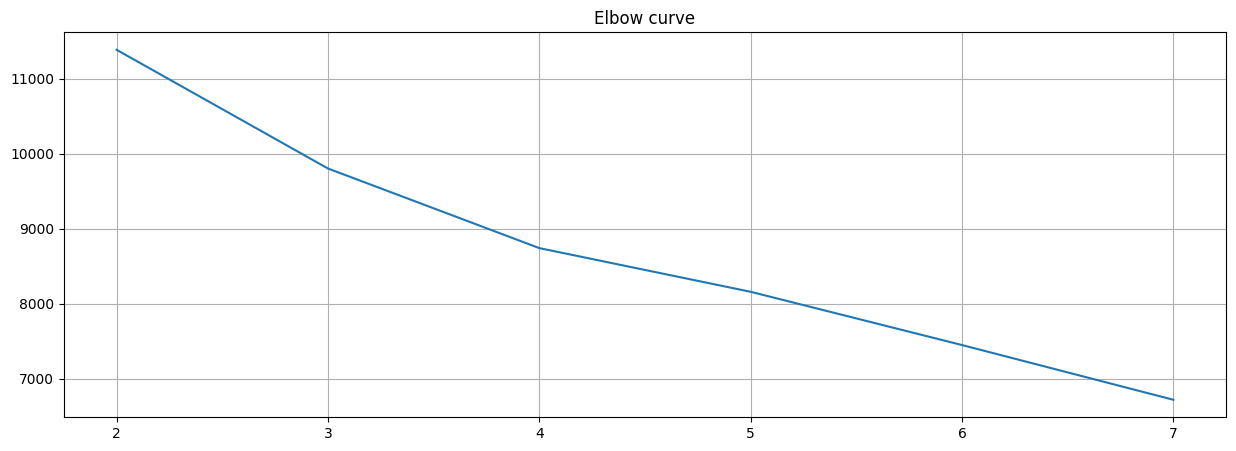

In [33]:
#using elbow plot to find the optimal number of clusters
print(training.head())
sse = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(training)
    sse.append(kmeans.inertia_)
print(sse)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 8), sse)
plt.grid(True)
plt.title('Elbow curve')

In [38]:
#running k means with 15 clusters
print(training.head())
kmeans = KMeans(n_clusters=4, random_state=0).fit(training)

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        0          0                     0                    0          0   
1        0          0                     0                    0          0   
2        0          0                     0                    0          0   
3        0          0                     0                    0          0   
4        0          0                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             1        1                 1  ...   
1       0           0             1        0                 1  ...   
2       0           0             1        1                 0  ...   
3       0           0             1        1                 1  ...   
4       0           0             1        1                 1  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0    

In [39]:
silhouetteavg=silhouette_score(lowvardata, kmeans.labels_)
print(silhouetteavg)

0.2515553700805171


In [ ]:
submission=pd.read_csv('submission.csv')
submission['cluster']=kmeans.labels_
submission.to_csv('submission.csv',index=False)